In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Read the dataset
df = pd.read_csv('PEP1.csv')

In [3]:
# Check the shape of the dataset
df.shape

(1460, 81)

In [4]:
# Check first 5 variables
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Check varibales with null variables
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchebvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functiol', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', '

In [6]:
# Identify variables with null values
df.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [7]:
# Count unique values in each column
uniquevalues = df.nunique()
uniquevalues

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [8]:
# Generate separate dataset for numeric and categorical data
numerical_data = df.select_dtypes(include=[np.number])
# Check first five variables 
numerical_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [9]:
# Generate separate dataset for categorical data
categorical_data = df.select_dtypes(exclude=[np.number])
# Check first five variables
categorical_data.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [10]:
# Check shape for numerical data
numerical_data.shape

(1460, 38)

In [11]:
# Check shape for categorical data
categorical_data.shape

(1460, 43)

### EDA with numerical data

In [12]:
# Check for missing values in the numerical valuables
numerical_data.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchebvGr         0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [13]:
numerical_data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchebvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [14]:
# Handling the missing values in the numerical dataset
from sklearn.impute import SimpleImputer
median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
median_imputer = median_imputer.fit(numerical_data)
imputed_df = median_imputer.transform(numerical_data.values)
numerical_data = pd.DataFrame(data=imputed_df, columns = ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',                                            
       'HalfBath', 'BedroomAbvGr', 'KitchebvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'])
numerical_data.head()

C:\Users\johns\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0


In [15]:
numerical_data.isna().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchebvGr       0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [16]:
numerical_data = numerical_data.drop(columns = ['Id'], axis = 1)

## Identify the skewness and distribution

C:\Users\johns\anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


<Figure size 432x288 with 0 Axes>

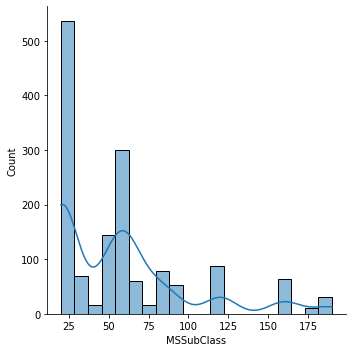

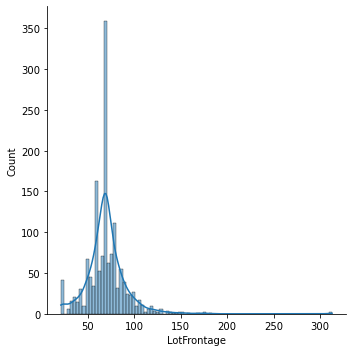

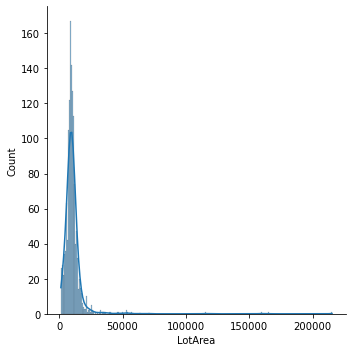

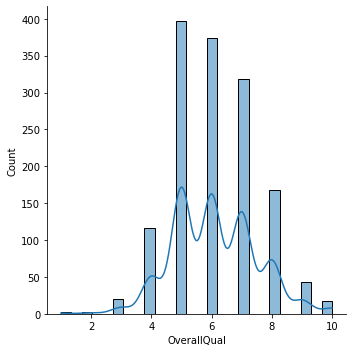

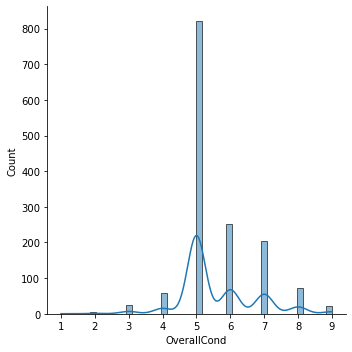

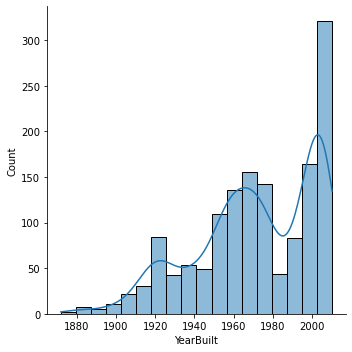

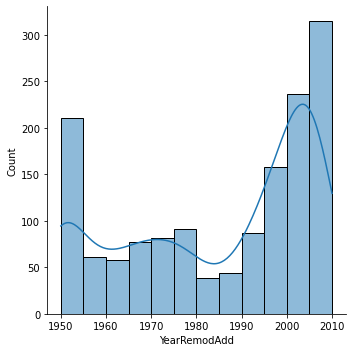

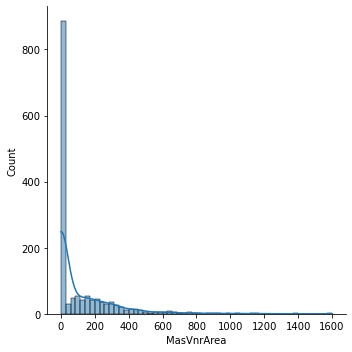

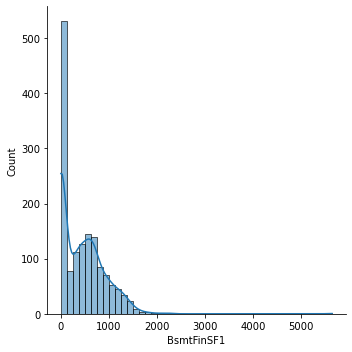

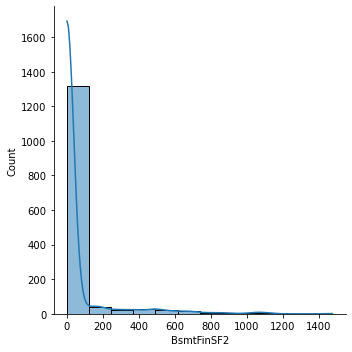

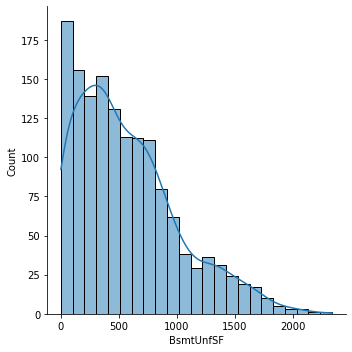

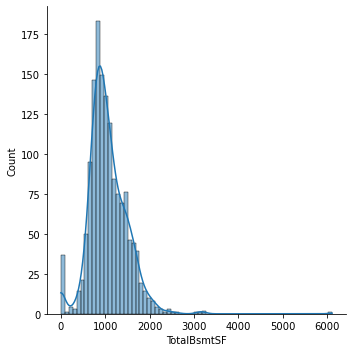

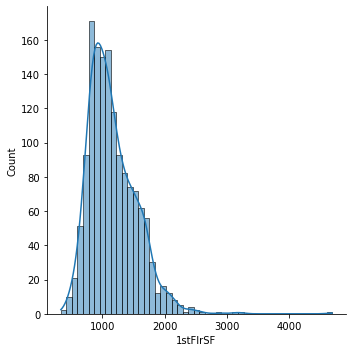

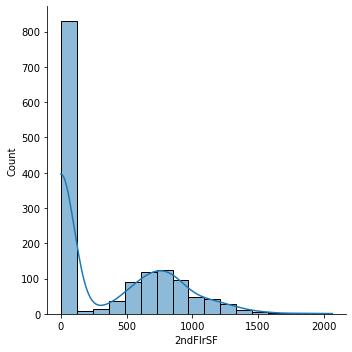

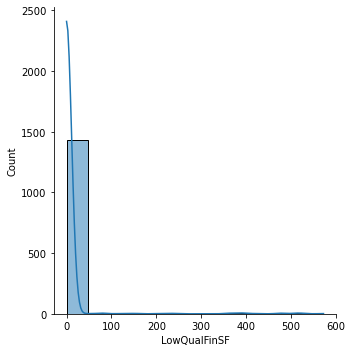

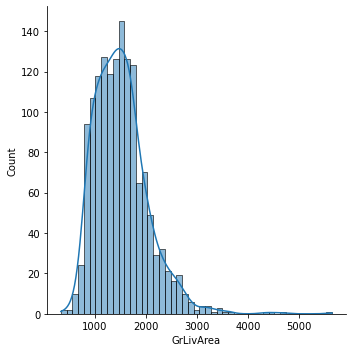

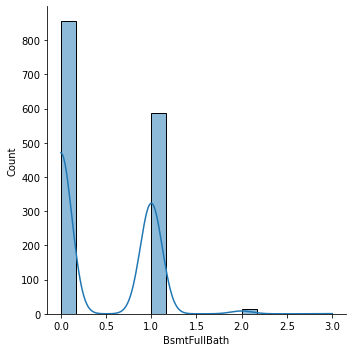

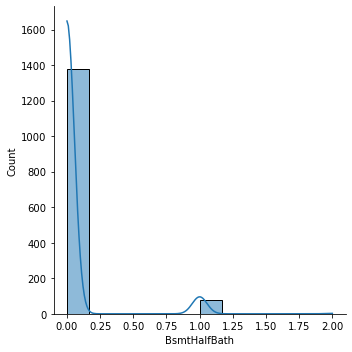

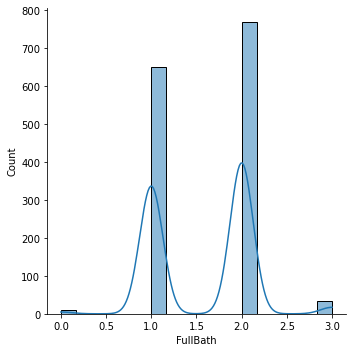

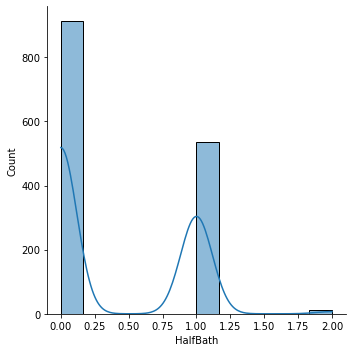

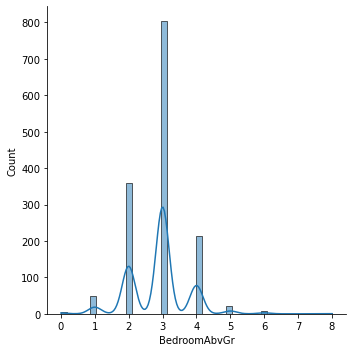

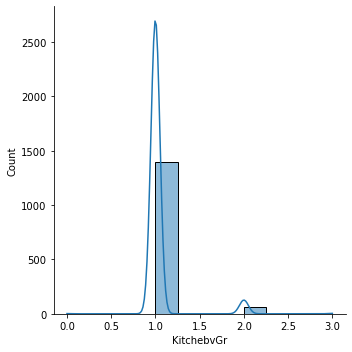

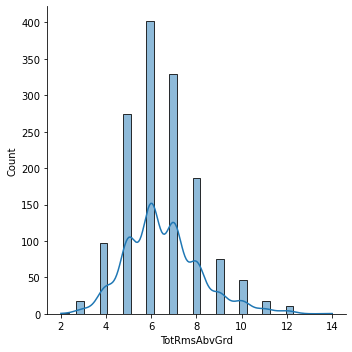

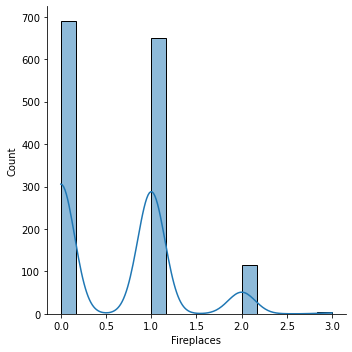

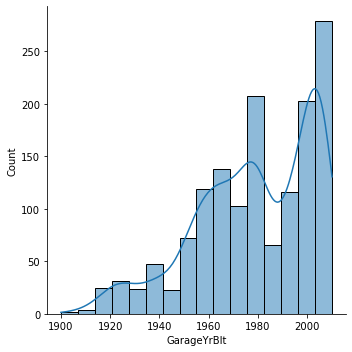

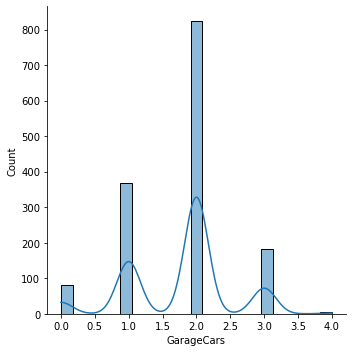

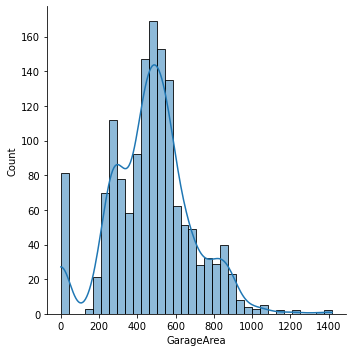

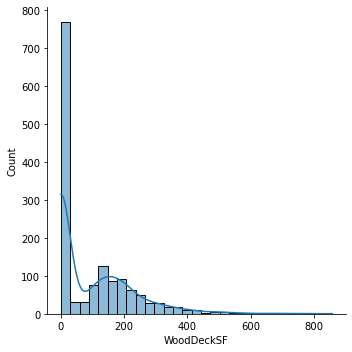

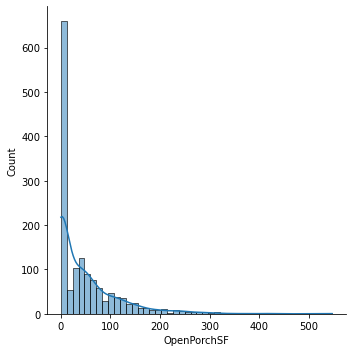

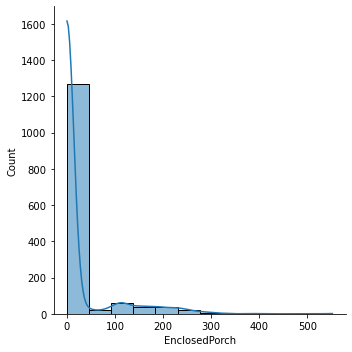

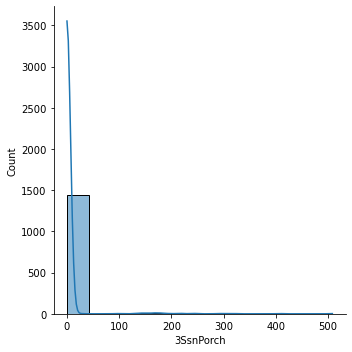

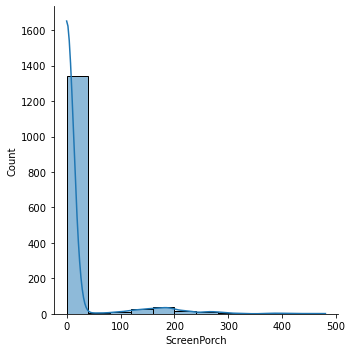

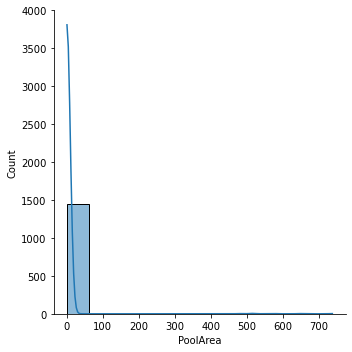

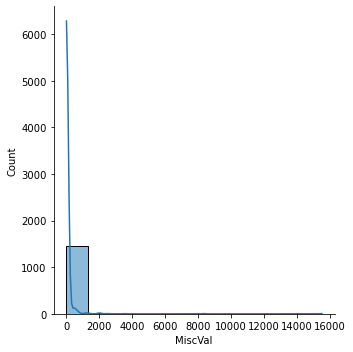

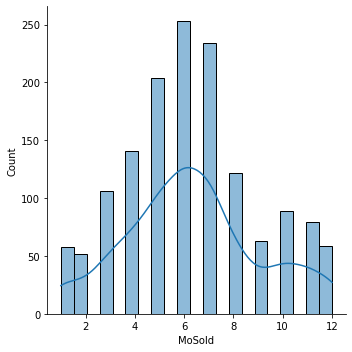

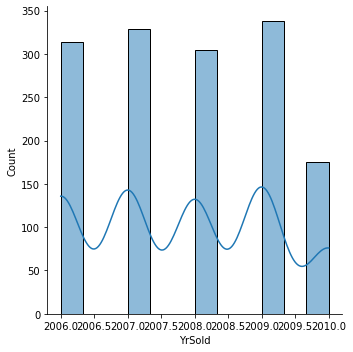

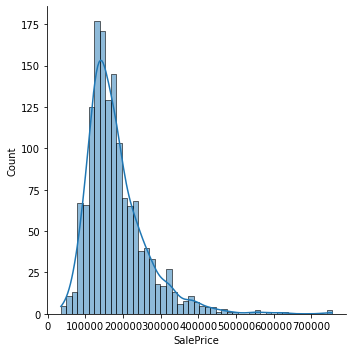

In [17]:
for n,col in enumerate(numerical_data.columns):
    plt.figure(n)
    sns.displot(numerical_data[col], kde=True)

Most of the data variables are skewed to the left such as 'MSSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 
'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'lstFlrSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'. Few variables are skewed to the right such as 'YearBuilt', 'GarageYrBlt'. 

##### We will consider correlations that are greater than or equal to 0.5 to be strong. Therefore, values (x> = 0.5) and values (x< = -0.5) will be selected.

In [18]:
# Independent and dependent variables
Y = numerical_data['SalePrice']
X = numerical_data.drop(['SalePrice'], axis = 1)
X.shape

(1460, 36)

In [19]:
# Using Pearson Correlation
# Check the correlation of the varibles
matrix = X.corr()
matrix.style.background_gradient(cmap='coolwarm')

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchebvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.081396,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.042463,0.124098,0.363472,0.413773,0.072388,0.037469,0.368007,0.090343,-0.006979,0.180534,0.047222,0.236840,-0.004905,0.320518,0.233221,0.062996,0.269539,0.323511,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.025865,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.514231,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.306276,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950
YearBuilt,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.777182,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618
YearRemodAdd,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.616444,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743
MasVnrArea,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.244444,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317
BsmtFinSF1,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.148782,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359
BsmtFinSF2,-0.065649,0.042463,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.087684,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706


In [20]:
# Select strong correlations among features
cor_pairs = matrix.unstack()
sorted_pairs = cor_pairs.sort_values(kind='quicksort')
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.7]

print(strong_pairs)

YearBuilt      GarageYrBlt      0.777182
GarageYrBlt    YearBuilt        0.777182
TotalBsmtSF    1stFlrSF         0.819530
1stFlrSF       TotalBsmtSF      0.819530
TotRmsAbvGrd   GrLivArea        0.825489
GrLivArea      TotRmsAbvGrd     0.825489
GarageArea     GarageCars       0.882475
GarageCars     GarageArea       0.882475
MSSubClass     MSSubClass       1.000000
MiscVal        MiscVal          1.000000
LowQualFinSF   LowQualFinSF     1.000000
2ndFlrSF       2ndFlrSF         1.000000
1stFlrSF       1stFlrSF         1.000000
TotalBsmtSF    TotalBsmtSF      1.000000
BsmtUnfSF      BsmtUnfSF        1.000000
BsmtFinSF2     BsmtFinSF2       1.000000
GrLivArea      GrLivArea        1.000000
BsmtFinSF1     BsmtFinSF1       1.000000
YearRemodAdd   YearRemodAdd     1.000000
YearBuilt      YearBuilt        1.000000
OverallCond    OverallCond      1.000000
OverallQual    OverallQual      1.000000
LotArea        LotArea          1.000000
LotFrontage    LotFrontage      1.000000
MasVnrArea     M

In [21]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Get top pairs
def get_top_abs_correlations(df, n=10):
    corr_list = df.abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    corr_list = corr_list.drop(labels=labels_to_drop).sort_values(ascending=False)
    return corr_list[0:n]

In [22]:
# Get top 10 correlation pairs
print('Top 10 correlation pairs:')
get_top_abs_correlations(matrix, 10)

Top 10 correlation pairs:


GarageCars    GarageArea      0.882475
GrLivArea     TotRmsAbvGrd    0.825489
TotalBsmtSF   1stFlrSF        0.819530
YearBuilt     GarageYrBlt     0.777182
2ndFlrSF      GrLivArea       0.687501
BedroomAbvGr  TotRmsAbvGrd    0.676620
BsmtFinSF1    BsmtFullBath    0.649212
GrLivArea     FullBath        0.630012
YearRemodAdd  GarageYrBlt     0.616444
2ndFlrSF      TotRmsAbvGrd    0.616423
dtype: float64

In [23]:
# Feature selection
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [24]:
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select = 5)
rfe = rfe.fit(X, Y)

C:\Users\johns\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\johns\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [25]:
# Check the RFE ranking
list(zip(X.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', False, 17),
 ('LotFrontage', False, 20),
 ('LotArea', False, 5),
 ('OverallQual', False, 23),
 ('OverallCond', False, 22),
 ('YearBuilt', False, 4),
 ('YearRemodAdd', False, 2),
 ('MasVnrArea', False, 10),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 11),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', False, 6),
 ('1stFlrSF', False, 7),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 16),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 30),
 ('BsmtHalfBath', False, 32),
 ('FullBath', False, 28),
 ('HalfBath', False, 29),
 ('BedroomAbvGr', False, 25),
 ('KitchebvGr', False, 31),
 ('TotRmsAbvGrd', False, 24),
 ('Fireplaces', False, 27),
 ('GarageYrBlt', False, 3),
 ('GarageCars', False, 26),
 ('GarageArea', False, 9),
 ('WoodDeckSF', False, 12),
 ('OpenPorchSF', False, 13),
 ('EnclosedPorch', False, 14),
 ('3SsnPorch', False, 19),
 ('ScreenPorch', False, 15),
 ('PoolArea', False, 18),
 ('MiscVal', False, 8),
 ('MoSold', False, 21),
 ('YrSold', True, 1)]

In [26]:
# Columns selected by RFE
col = X.columns[rfe.support_]
col

Index(['BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', 'GrLivArea', 'YrSold'], dtype='object')

In [27]:
# columns not selected by RFE
X.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2', 'TotalBsmtSF',
       '1stFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchebvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold'],
      dtype='object')

In [28]:
# Check the varibles that are strongly correlated with the target variable SalePrice
numerical_data = numerical_data[col]
numerical_data.head()

,BsmtFinSF1,BsmtUnfSF,2ndFlrSF,GrLivArea,YrSold
0,706.0,150.0,854.0,1710.0,2008.0
1,978.0,284.0,0.0,1262.0,2007.0
2,486.0,434.0,866.0,1786.0,2008.0
3,216.0,540.0,756.0,1717.0,2006.0
4,655.0,490.0,1053.0,2198.0,2008.0


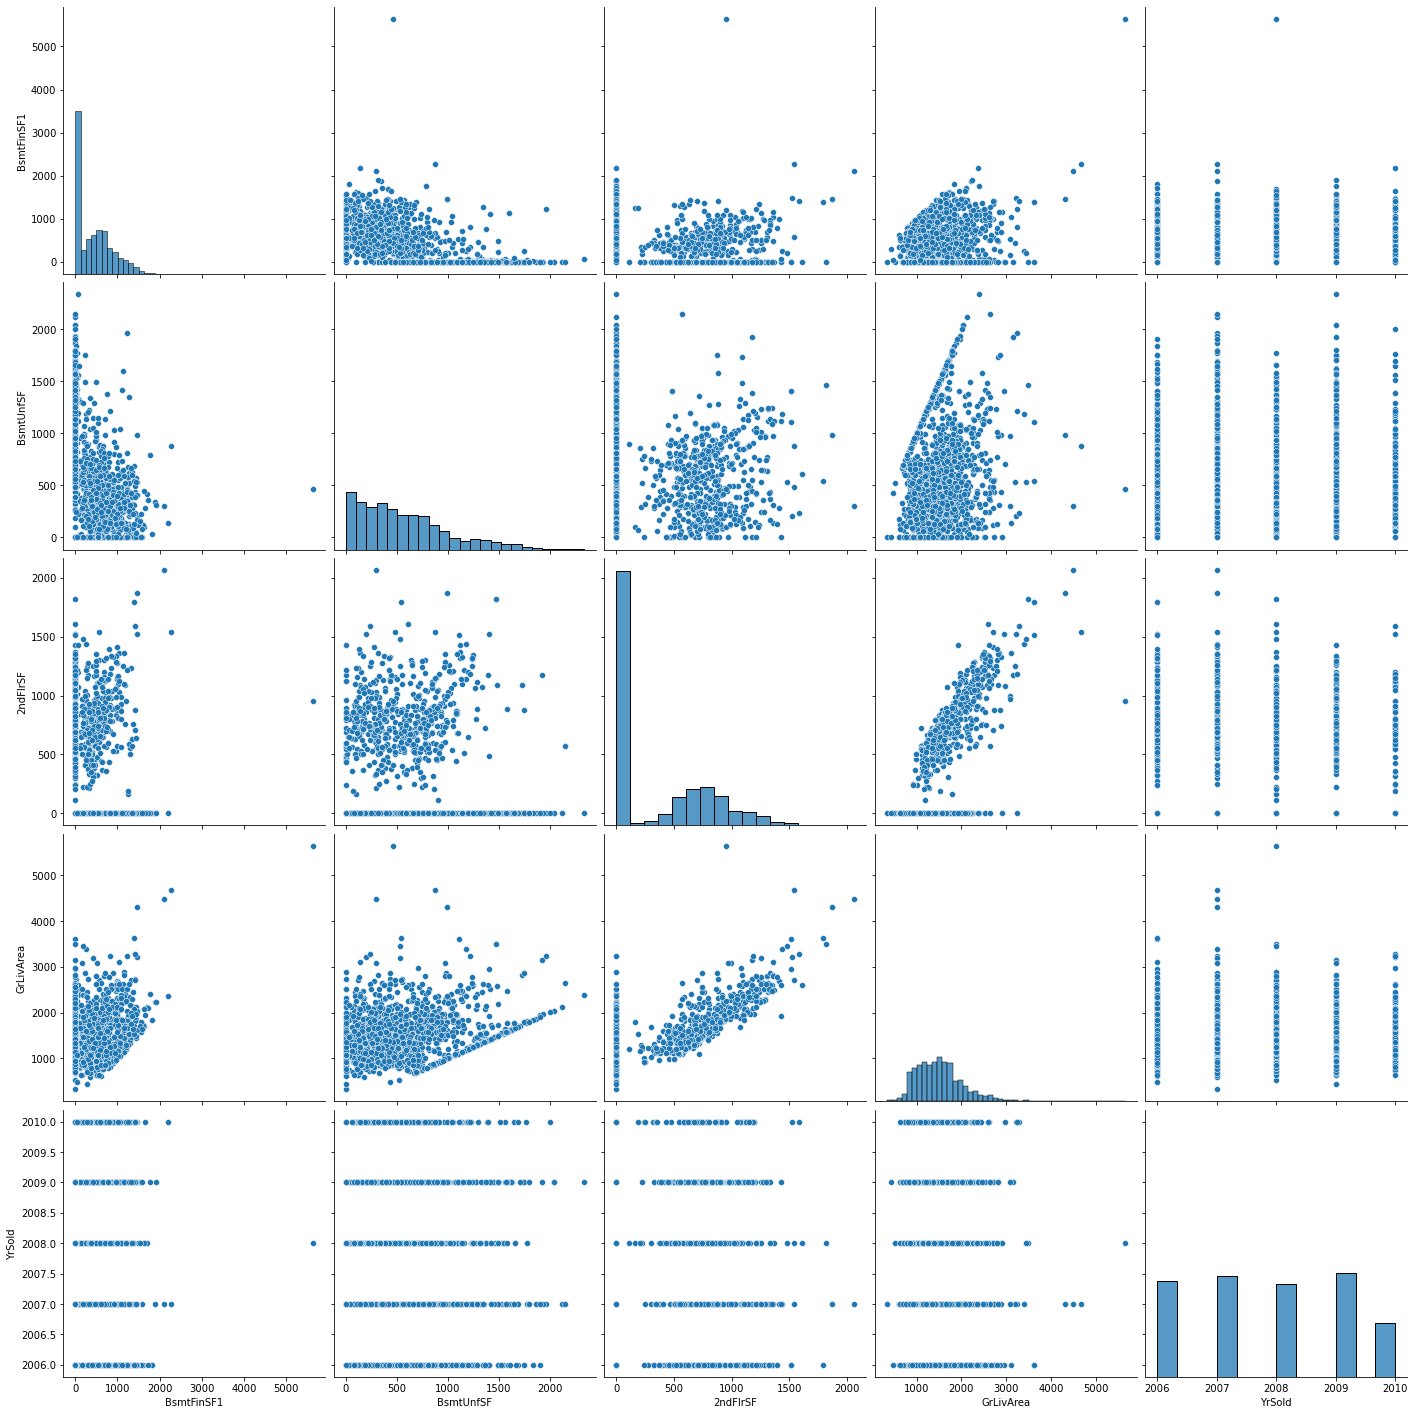

In [29]:
# Draw a pair plot using sns for OverallQual, TotalBsmtSF, 1stFlrSF, GrLivArea, GarageCars, GarageArea
sns.pairplot(numerical_data, height = 4)

## EDA with categorical data

In [30]:
# Check the first five variables
categorical_data.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [31]:
# Check unique variables
uniquevalues = categorical_data.nunique()
uniquevalues

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functiol          7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

In [32]:
# Check for missing values in categorical data
categorical_data.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functiol            0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

### Missing value treatment for categorical data

In [33]:
categorical_data = categorical_data.fillna(categorical_data.mode().iloc[0])

In [34]:
# Check if at all missing values have been handled
categorical_data.isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functiol         0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

### Encoding

In [35]:
# Check the columns of categorical variables
categorical_data.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functiol', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [36]:
# Encoding categorical data
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

categorical_data = ord_enc.fit_transform(categorical_data)

In [37]:
# Check fisrt five variables
categorical_data = pd.DataFrame(categorical_data)
categorical_data.columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functiol', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']
 
categorical_data.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3.0,1.0,0.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,...,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
1,3.0,1.0,0.0,3.0,3.0,0.0,2.0,0.0,23.0,1.0,...,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
2,3.0,1.0,0.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,...,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
3,3.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,...,5.0,2.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,0.0
4,3.0,1.0,0.0,0.0,3.0,0.0,2.0,0.0,14.0,2.0,...,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0


C:\Users\johns\AppData\Local\Temp/ipykernel_10628/643657192.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


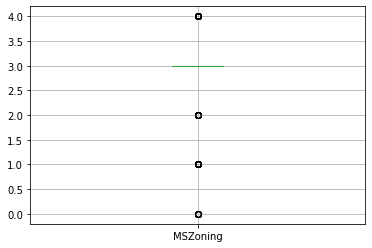

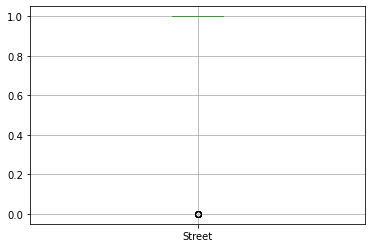

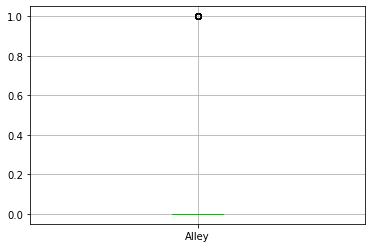

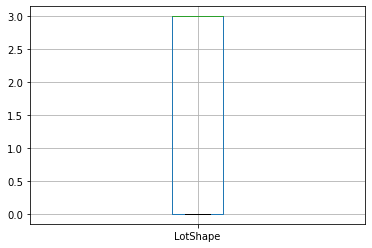

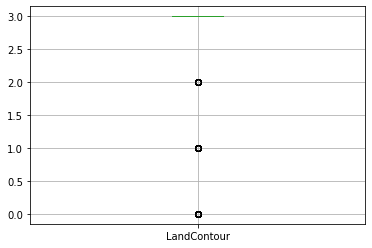

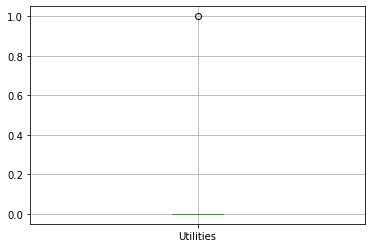

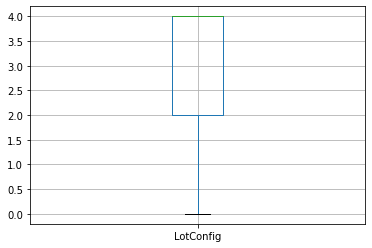

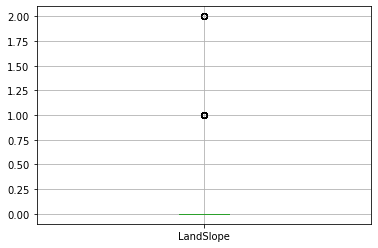

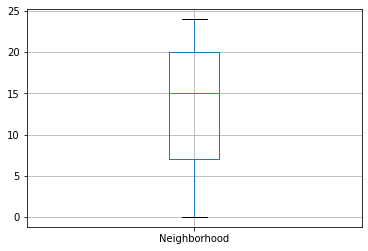

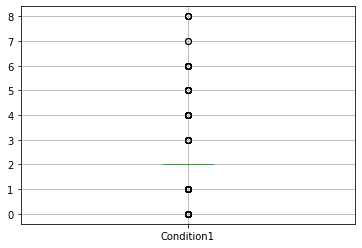

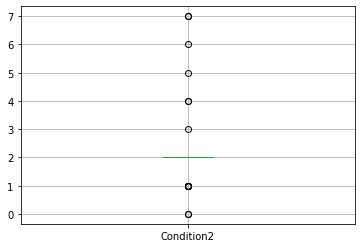

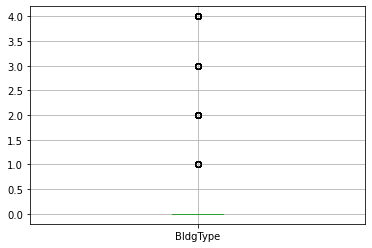

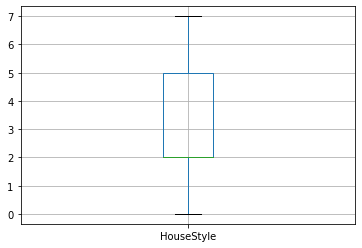

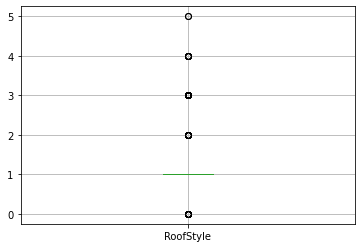

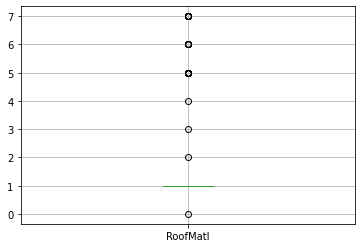

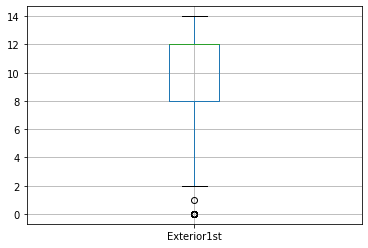

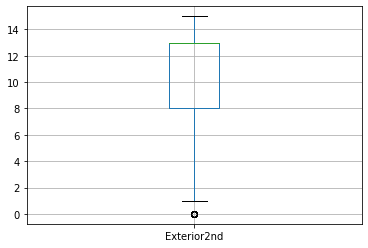

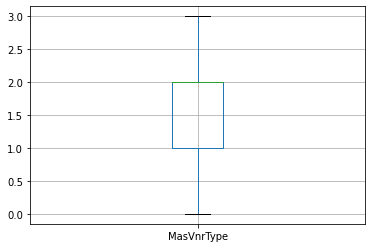

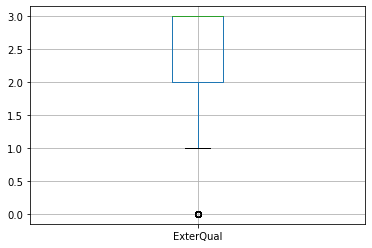

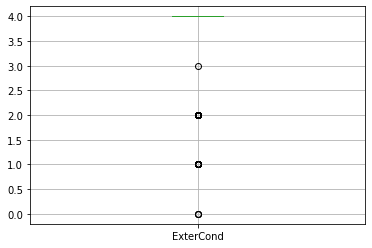

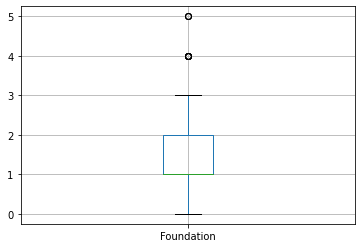

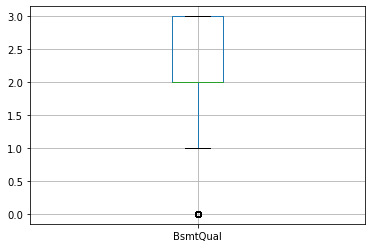

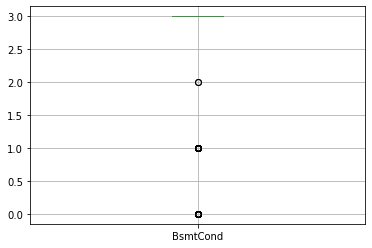

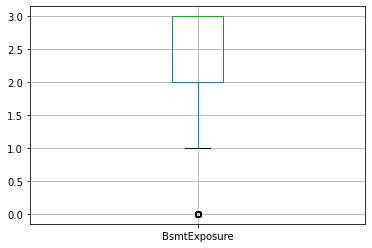

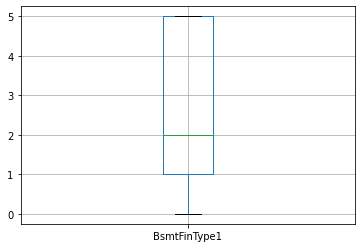

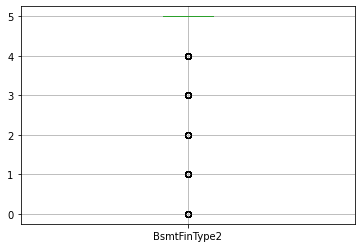

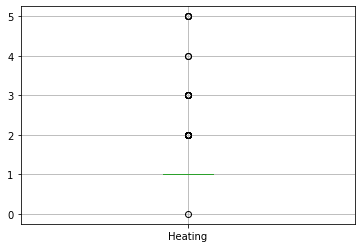

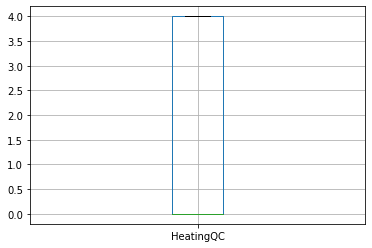

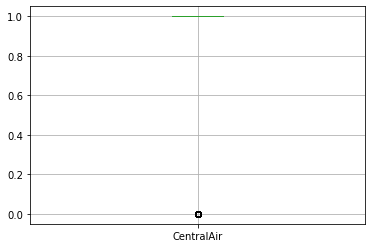

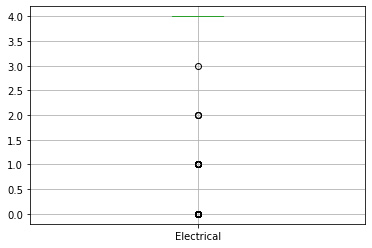

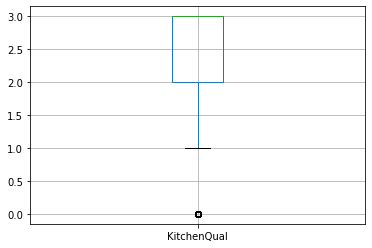

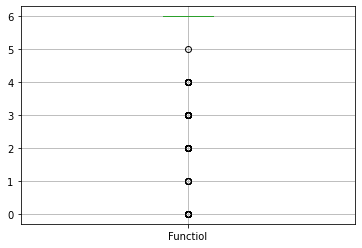

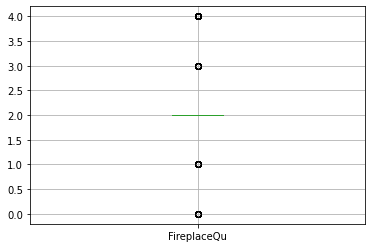

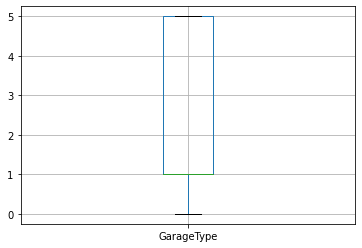

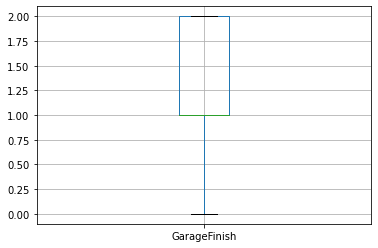

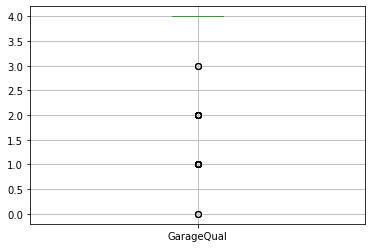

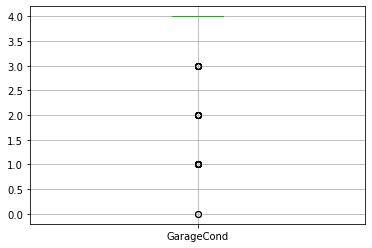

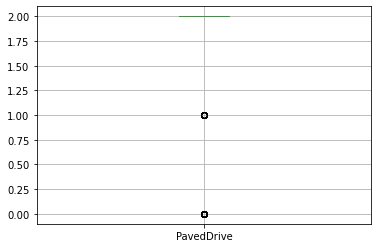

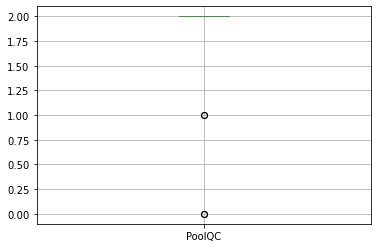

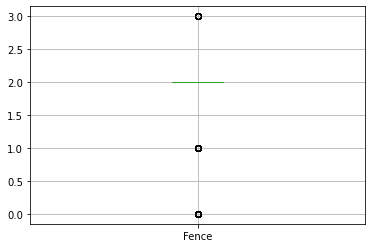

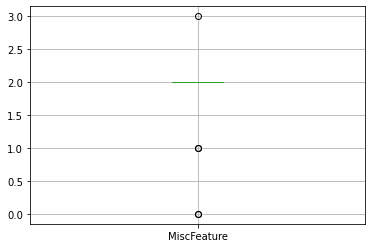

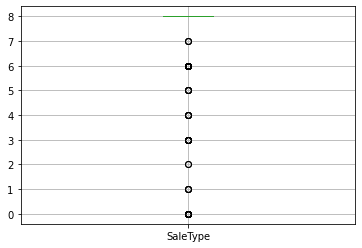

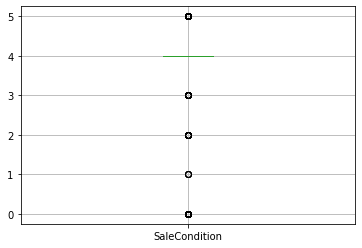

In [38]:
# Count plot and box plot
# Box plot
for column in categorical_data:
    plt.figure()
    categorical_data.boxplot([column])

In [39]:
# Feature selection using chi_squre and p_values

In [40]:
# Perform the chi test
from sklearn.feature_selection import chi2
# calculating Fscore and p value
f_p_values = chi2(categorical_data, Y)
f_p_values

(array([1.13803139e+02, 3.65060135e+00, 6.71972319e+02, 8.02972897e+02,
        1.24357379e+02, 2.42333333e+02, 5.64633630e+02, 8.89793781e+02,
        2.59586439e+03, 2.12616289e+02, 2.73364812e+01, 1.95147825e+03,
        8.12887720e+02, 3.56053615e+02, 2.29029740e+02, 6.96025906e+02,
        8.08619925e+02, 1.61240019e+02, 2.09777237e+02, 8.77695965e+01,
        3.02333392e+02, 3.41659695e+02, 9.94527500e+01, 4.42175724e+02,
        7.92800700e+02, 1.10094536e+02, 6.76132408e+01, 1.48314493e+03,
        5.38023349e+01, 2.13371047e+02, 3.03823780e+02, 9.75197544e+01,
        2.46006888e+02, 1.02524737e+03, 5.09901764e+02, 5.92883544e+01,
        3.88207389e+01, 9.32892554e+01, 2.41227081e+00, 5.45860473e+01,
        2.54547654e+00, 1.87470404e+02, 2.12586578e+02]),
 array([1.00000000e+000, 1.00000000e+000, 3.85525651e-001, 1.32609803e-004,
        1.00000000e+000, 1.00000000e+000, 9.97453183e-001, 6.85967589e-009,
        2.31605047e-226, 1.00000000e+000, 1.00000000e+000, 2.81882006e

Chi-square is used to find F-score and p-values for all features. So in this case the first array is for F score and the second array is for p- values.The more the value of the F score the more important the feature is and the lesser the value of the p-value the more important will be the feature.

In [41]:
# Representing in list form
p_values = pd.Series(f_p_values[1])
p_values.index = categorical_data.columns
p_values

MSZoning          1.000000e+00
Street            1.000000e+00
Alley             3.855257e-01
LotShape          1.326098e-04
LandContour       1.000000e+00
Utilities         1.000000e+00
LotConfig         9.974532e-01
LandSlope         6.859676e-09
Neighborhood     2.316050e-226
Condition1        1.000000e+00
Condition2        1.000000e+00
BldgType         2.818820e-127
HouseStyle        5.096798e-05
RoofStyle         1.000000e+00
RoofMatl          1.000000e+00
Exterior1st       1.741724e-01
Exterior2nd       7.736118e-05
MasVnrType        1.000000e+00
ExterQual         1.000000e+00
ExterCond         1.000000e+00
Foundation        1.000000e+00
BsmtQual          1.000000e+00
BsmtCond          1.000000e+00
BsmtExposure      1.000000e+00
BsmtFinType1      3.368821e-04
BsmtFinType2      1.000000e+00
Heating           1.000000e+00
HeatingQC         7.831579e-65
CentralAir        1.000000e+00
Electrical        1.000000e+00
KitchenQual       1.000000e+00
Functiol          1.000000e+00
Fireplac

In [42]:
# Sorting values in ascending order
p_values.sort_values(ascending=True)

Neighborhood     2.316050e-226
BldgType         2.818820e-127
HeatingQC         7.831579e-65
GarageType        3.954881e-18
LandSlope         6.859676e-09
HouseStyle        5.096798e-05
Exterior2nd       7.736118e-05
LotShape          1.326098e-04
BsmtFinType1      3.368821e-04
Exterior1st       1.741724e-01
Alley             3.855257e-01
LotConfig         9.974532e-01
GarageFinish      9.999971e-01
BsmtExposure      1.000000e+00
PavedDrive        1.000000e+00
GarageQual        1.000000e+00
PoolQC            1.000000e+00
Fence             1.000000e+00
MiscFeature       1.000000e+00
FireplaceQu       1.000000e+00
Functiol          1.000000e+00
KitchenQual       1.000000e+00
Electrical        1.000000e+00
CentralAir        1.000000e+00
GarageCond        1.000000e+00
MSZoning          1.000000e+00
BsmtQual          1.000000e+00
BsmtFinType2      1.000000e+00
BsmtCond          1.000000e+00
SaleType          1.000000e+00
Foundation        1.000000e+00
ExterCond         1.000000e+00
ExterQua

Since features such as Neighborhood, BldgType, HeatingQC, GarageType and LandSlope have a p value < 0.05, they are best features chosen for modeling.

In [43]:
categorical_data = categorical_data[['Neighborhood', 'BldgType', 'HeatingQC', 'GarageType', 'LandSlope', 'HouseStyle',
                                     'LotShape', 'BsmtFinType1']]
categorical_data.head()

,Neighborhood,BldgType,HeatingQC,GarageType,LandSlope,HouseStyle,LotShape,BsmtFinType1
0,5.0,0.0,0.0,1.0,0.0,5.0,3.0,2.0
1,23.0,0.0,0.0,1.0,0.0,2.0,3.0,0.0
2,5.0,0.0,0.0,1.0,0.0,5.0,0.0,2.0
3,6.0,0.0,2.0,5.0,0.0,5.0,0.0,0.0
4,14.0,0.0,0.0,1.0,0.0,5.0,0.0,2.0


In [44]:
# Combine the significant variables obtained from numerical and categorical data
transformed_data = pd.concat([numerical_data, categorical_data], axis=1)
transformed_data

,BsmtFinSF1,BsmtUnfSF,2ndFlrSF,GrLivArea,YrSold,Neighborhood,BldgType,HeatingQC,GarageType,LandSlope,HouseStyle,LotShape,BsmtFinType1
0,706.0,150.0,854.0,1710.0,2008.0,5.0,0.0,0.0,1.0,0.0,5.0,3.0,2.0
1,978.0,284.0,0.0,1262.0,2007.0,23.0,0.0,0.0,1.0,0.0,2.0,3.0,0.0
2,486.0,434.0,866.0,1786.0,2008.0,5.0,0.0,0.0,1.0,0.0,5.0,0.0,2.0
3,216.0,540.0,756.0,1717.0,2006.0,6.0,0.0,2.0,5.0,0.0,5.0,0.0,0.0
4,655.0,490.0,1053.0,2198.0,2008.0,14.0,0.0,0.0,1.0,0.0,5.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,953.0,694.0,1647.0,2007.0,8.0,0.0,0.0,1.0,0.0,5.0,3.0,5.0
1456,790.0,589.0,0.0,2073.0,2010.0,13.0,0.0,4.0,1.0,0.0,2.0,3.0,0.0
1457,275.0,877.0,1152.0,2340.0,2010.0,6.0,0.0,0.0,1.0,0.0,5.0,3.0,2.0
1458,49.0,0.0,0.0,1078.0,2010.0,24.0,0.0,2.0,1.0,0.0,2.0,3.0,2.0


In [45]:
transformed_data.columns

Index(['BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', 'GrLivArea', 'YrSold',
       'Neighborhood', 'BldgType', 'HeatingQC', 'GarageType', 'LandSlope',
       'HouseStyle', 'LotShape', 'BsmtFinType1'],
      dtype='object')

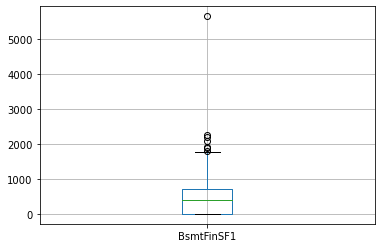

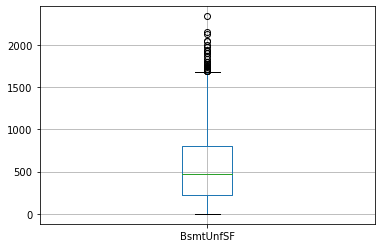

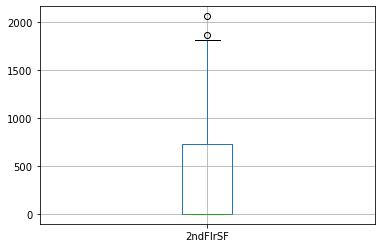

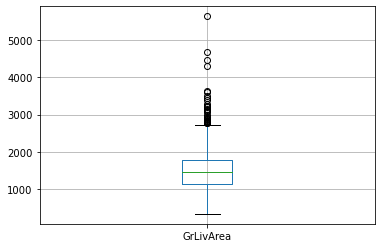

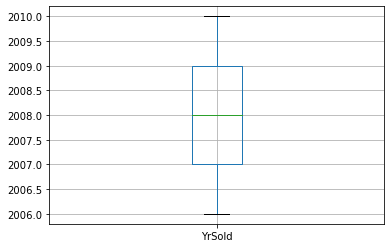

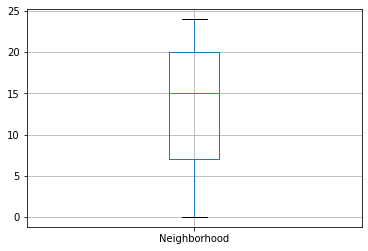

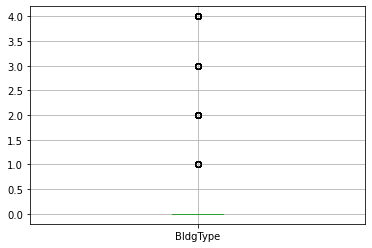

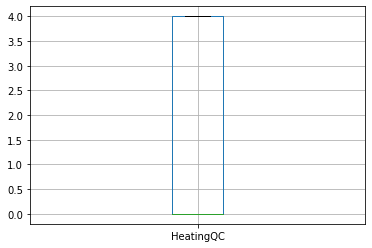

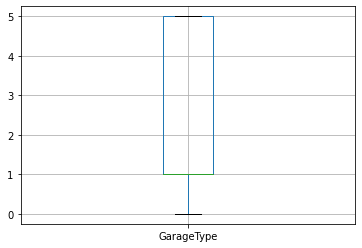

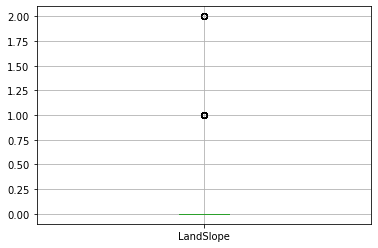

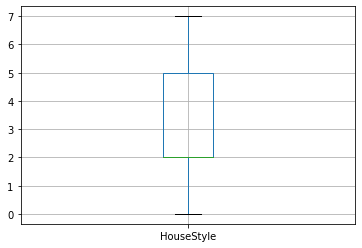

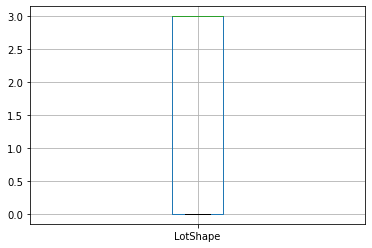

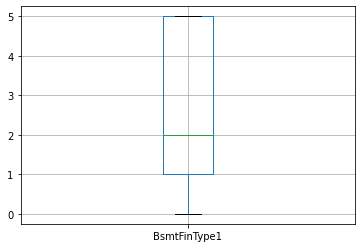

In [46]:
# Box plot for transformed data
for column in transformed_data:
    plt.figure()
    transformed_data.boxplot([column])

Features such as have 'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', 'GrLivArea' in the upper bound

In [47]:
# Handling outliers by determing what the upper bound should be
def detect_outlier(feature):
    outliers = []
    data = transformed_data[feature]
    mean = np.mean(data)
    std =np.std(data)
    
    
    for y in data:
        z_score= (y - mean)/std 
        if np.abs(z_score) > 3:
            outliers.append(y)
    print('\nOutlier caps for {}:'.format(feature))
    print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
                                                             len([i for i in data
                                                                  if i > data.quantile(.95)])))
    print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
    print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99),
                                                             len([i for i in data
                                                                  if i > data.quantile(.99)])))

In [48]:
# Determine what the upperbound should be for continuous features in testing data
for feat in ['BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', 'GrLivArea']:
    detect_outlier(feat)


Outlier caps for BsmtFinSF1:
  --95p: 1274.0 / 71 values exceed that
  --3sd: 1811.5 / 6 values exceed that
  --99p: 1572.4 / 15 values exceed that

Outlier caps for BsmtUnfSF:
  --95p: 1468.0 / 72 values exceed that
  --3sd: 1892.4 / 11 values exceed that
  --99p: 1797.1 / 15 values exceed that

Outlier caps for 2ndFlrSF:
  --95p: 1141.0 / 73 values exceed that
  --3sd: 1656.1 / 4 values exceed that
  --99p: 1418.9 / 15 values exceed that

Outlier caps for GrLivArea:
  --95p: 2466.1 / 73 values exceed that
  --3sd: 3091.4 / 16 values exceed that
  --99p: 3123.5 / 15 values exceed that


95 % was chosen as the upper bound considering the largness of the cap in all selected features

In [49]:
# Cap features
transformed_data['BsmtFinSF1'] = transformed_data['BsmtFinSF1'].clip(upper=transformed_data['BsmtFinSF1'].quantile(.95))
transformed_data['BsmtUnfSF'] = transformed_data['BsmtUnfSF'].clip(upper=transformed_data['BsmtUnfSF'].quantile(.95))
transformed_data['2ndFlrSF'] = transformed_data['2ndFlrSF'].clip(upper=transformed_data['2ndFlrSF'].quantile(.95))
transformed_data['GrLivArea'] = transformed_data['GrLivArea'].clip(upper=transformed_data['GrLivArea'].quantile(.95))

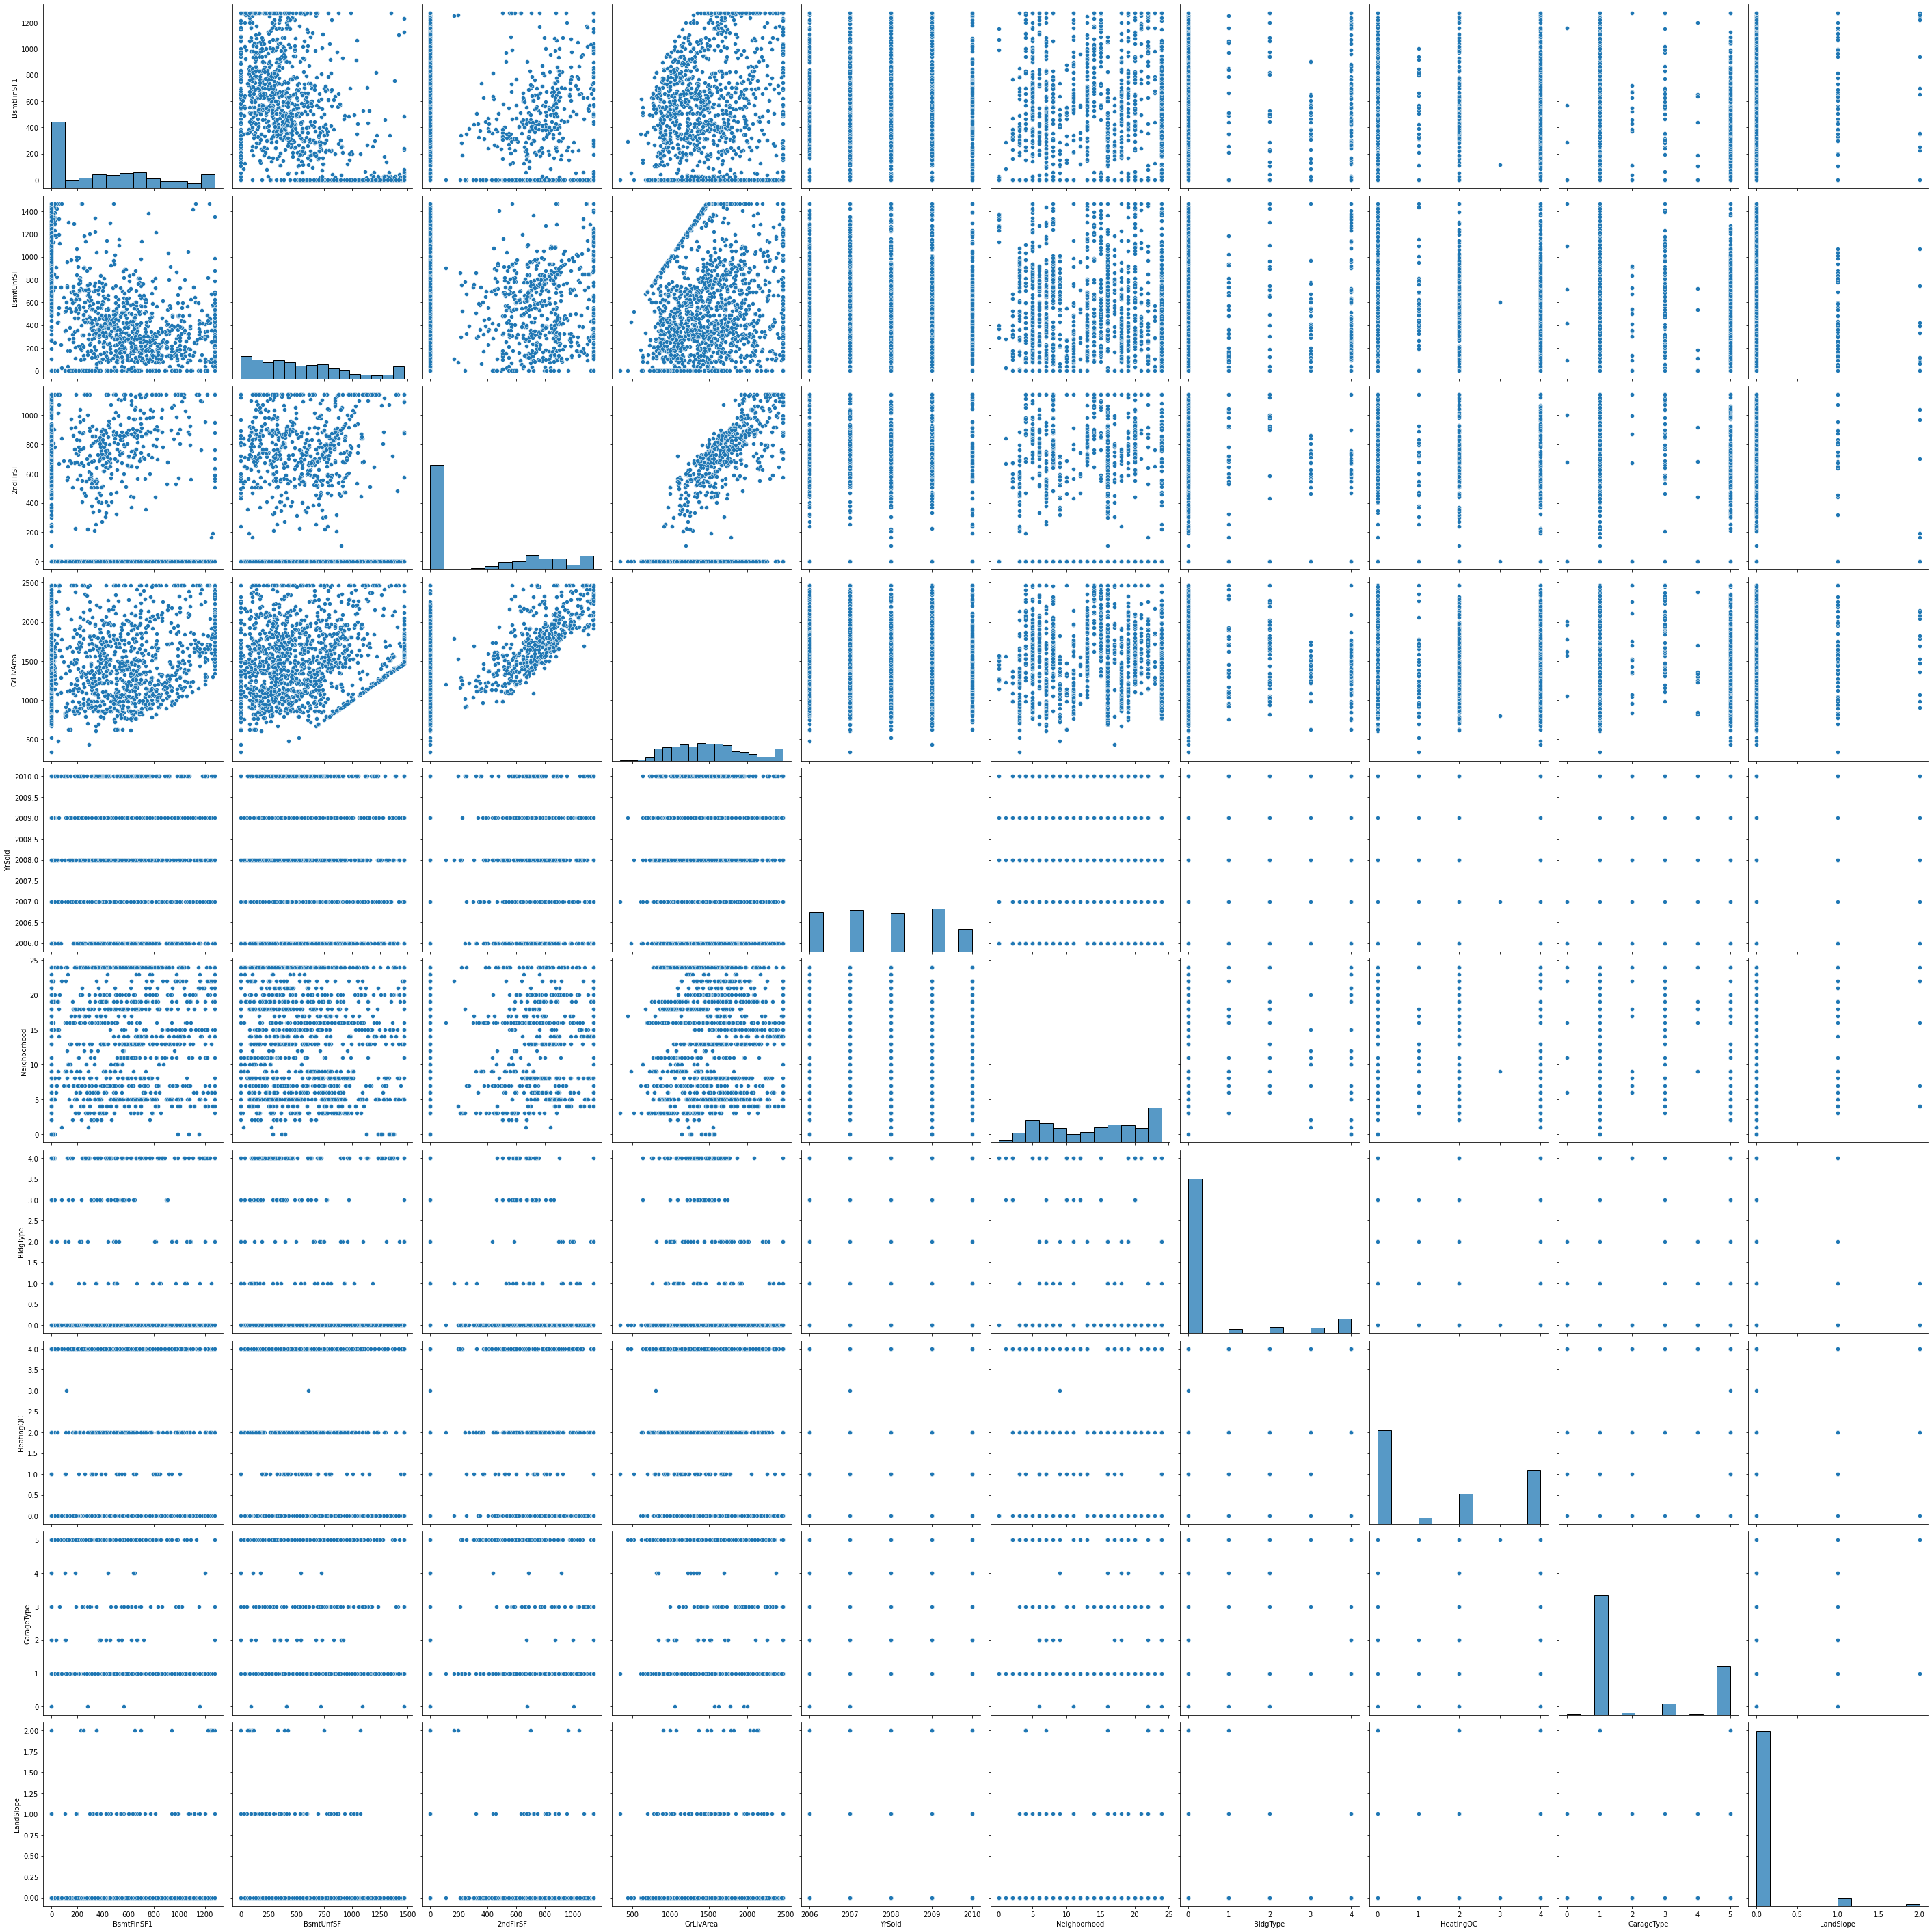

In [50]:
# Pair plot
# Checking the skewness of the data again
# Draw a pair plot using sns for LotShape, LotConfig, Neighborhood, HouseStyle, MasVnrType, BsmtFinType1, HeatingQC, GarageType, GarageFinish
sns.pairplot(transformed_data[['BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', 'GrLivArea', 'YrSold',
       'Neighborhood', 'BldgType', 'HeatingQC', 'GarageType', 'LandSlope']], height = 4)

It can be seen that skewness of varibles is no nolonger signficant and that the data values are not strongly correlated to each other. Which means that decions made by the model will not be based on noise.

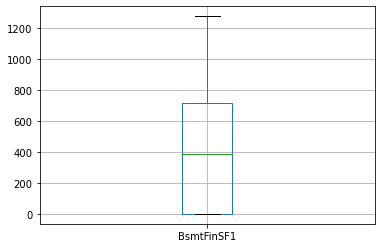

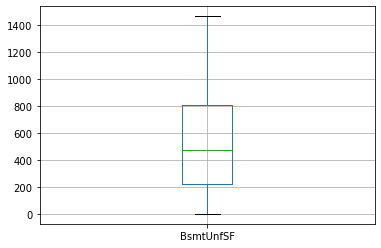

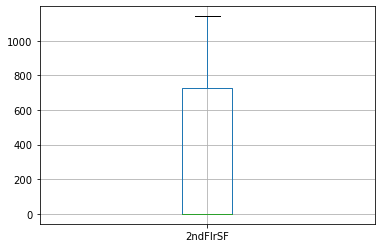

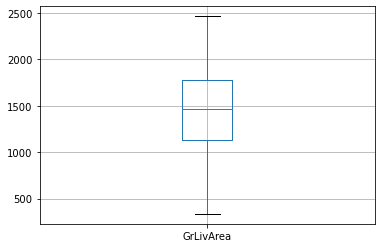

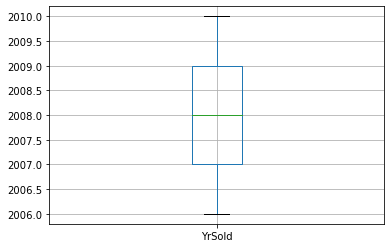

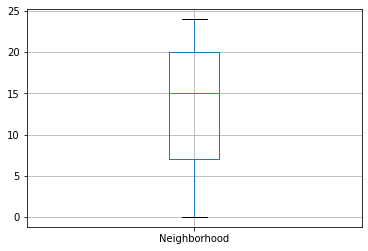

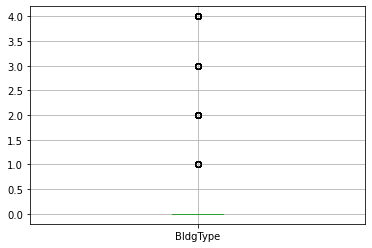

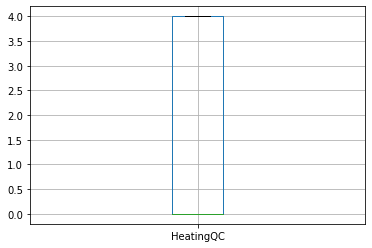

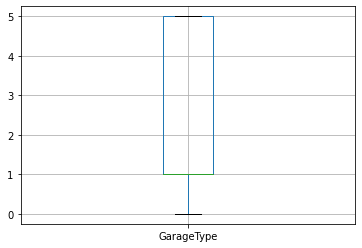

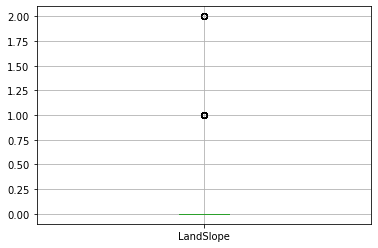

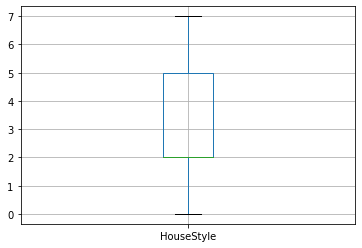

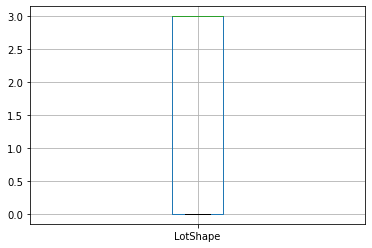

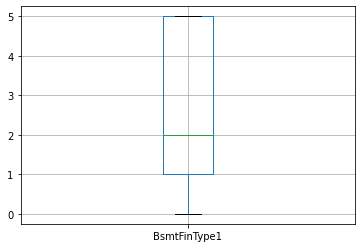

In [51]:
# Cheking for outliers in the data again
for column in transformed_data:
    plt.figure()
    transformed_data.boxplot([column])

It can be seen that data no longer contains outliers

In [52]:
# Therefore, the following are the factors that influence the price negotiation while buying a house
transformed_data.columns

Index(['BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', 'GrLivArea', 'YrSold',
       'Neighborhood', 'BldgType', 'HeatingQC', 'GarageType', 'LandSlope',
       'HouseStyle', 'LotShape', 'BsmtFinType1'],
      dtype='object')